In [126]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('IPL Matches 2008-2020.csv')

In [4]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,816.0,756349.553922,305894.254804,335982.0,501227.75,729298.0,1082626.25,1237181.0
neutral_venue,816.0,0.094363,0.292512,0.0,0.00,0.0,0.00,1.0
result_margin,799.0,17.321652,22.068427,1.0,6.00,8.0,19.50,146.0


In [10]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [8]:
df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
for i in df.columns:
    print(i,' : ',df[i].nunique())
    print(df[i].unique())
    print('\n')

id  :  816
[ 335982  335983  335984  335985  335986  335987  335988  335989  335990
  335991  335992  335993  335994  335995  335996  335997  335998  335999
  336000  336001  336002  336003  336004  336005  336006  336007  336008
  336009  336010  336011  336012  336013  336014  336015  336016  336017
  336018  336019  336020  336021  336022  336023  336024  336025  336026
  336027  336028  336029  336031  336032  336033  336034  336035  336036
  336037  336038  336039  336040  392181  392182  392183  392184  392185
  392186  392188  392189  392190  392191  392192  392194  392195  392196
  392197  392198  392199  392200  392201  392202  392203  392204  392205
  392206  392207  392208  392209  392210  392211  392212  392213  392214
  392215  392216  392217  392218  392219  392220  392221  392222  392223
  392224  392225  392226  392227  392228  392229  392230  392231  392232
  392233  392234  392235  392236  392237  392238  392239  419106  419107
  419108  419109  419110  419111  419112

In [13]:
year = []
for i in df.date:
    year.append(i[:4])

In [14]:
df['year'] = year
col = df.pop('year')
df.insert(3,'year',col)

In [19]:
df.tail()

,id,city,date,year,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
811,1216547,Dubai,2020-09-28,2020,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,2020,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,2020,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,2020,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,2020,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [71]:
ml = df.copy()

In [72]:
ml.head()

,id,city,date,year,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [73]:
ml = ml[['city','year','venue','neutral_venue','team1','team2','toss_winner','toss_decision','eliminator',
         'umpire1','umpire2','winner']]

In [74]:
ml.head()

,city,year,venue,neutral_venue,team1,team2,toss_winner,toss_decision,eliminator,umpire1,umpire2,winner
0,Bangalore,2008,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,N,Asad Rauf,RE Koertzen,Kolkata Knight Riders
1,Chandigarh,2008,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,N,MR Benson,SL Shastri,Chennai Super Kings
2,Delhi,2008,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,N,Aleem Dar,GA Pratapkumar,Delhi Daredevils
3,Mumbai,2008,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,N,SJ Davis,DJ Harper,Royal Challengers Bangalore
4,Kolkata,2008,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,N,BF Bowden,K Hariharan,Kolkata Knight Riders


In [97]:
for i in ml.columns:
    if ml[i].dtype == 'O':
        print(i)

umpire1
umpire2
winner


In [76]:
city_list = ml.city.unique().tolist()
city_id = np.arange(1,len(city_list)+1)
ml['city'].replace(to_replace=city_list,value=city_id,inplace=True)

In [77]:
ml['year'] = ml['year'].astype(int)

In [78]:
ven_list = ml.venue.unique().tolist()
ven_id = np.arange(1,len(ven_list)+1)
ml['venue'].replace(ven_list,ven_id,True)

In [83]:
team_list = ml.team1.unique()
team_id = np.arange(1,len(team_list)+1)

In [90]:
ml['team1'].replace(team_list,team_id,inplace=True)
ml['team2'].replace(team_list,team_id,inplace=True)
ml['toss_winner'].replace(team_list,team_id,inplace=True)

In [93]:
ml['toss_decision'] = ml['toss_decision'].map({'bat':1,'field':2})

In [95]:
ml['eliminator'] = ml['eliminator'].map({'Y':1,'N':0})

In [98]:
ml['winner'].replace(team_list,team_id,True)

In [102]:
ml.drop(['umpire1','umpire2'],axis=1,inplace=True)

In [103]:
ml.head()

,city,year,venue,neutral_venue,team1,team2,toss_winner,toss_decision,eliminator,winner
0,1,2008,1,0,1,5,1,2,0.0,5.0
1,2,2008,2,0,2,8,8,1,0.0,8.0
2,3,2008,3,0,3,6,6,1,0.0,3.0
3,4,2008,4,0,4,1,4,1,0.0,1.0
4,5,2008,5,0,5,7,7,1,0.0,5.0


In [136]:
ml.isnull().sum()

city             0
year             0
venue            0
neutral_venue    0
team1            0
team2            0
toss_winner      0
toss_decision    0
eliminator       0
winner           0
dtype: int64

### Dropping nulls

In [135]:
ml.dropna(inplace=True,axis=0)

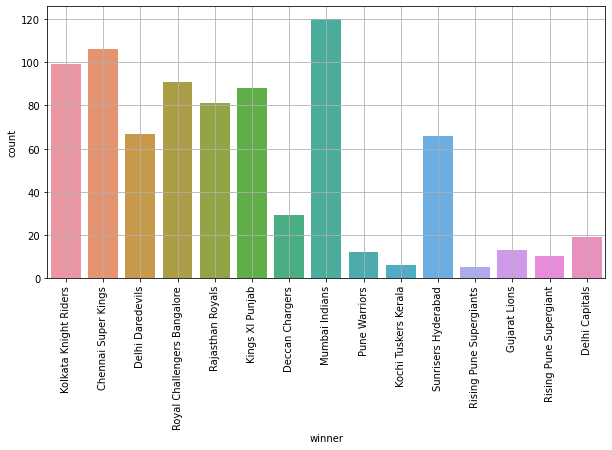

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(df.winner)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [154]:
test = ml.loc[ml.year == 2020]

In [159]:
ml = ml.loc[ml.year < 2020]

In [160]:
x = ml.drop('winner',axis=1)
y = ml.winner

In [161]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
xgbrf = XGBRFClassifier()
cat = CatBoostClassifier()
lgb = LGBMClassifier()

In [162]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=44, test_size=0.15)

In [163]:
lr.fit(xtrain,ytrain)
lr_test_pred = lr.predict(xtest)
lr_test_pp = lr.predict_proba(xtest)
lr_test_acc = accuracy_score(ytest,lr_test_pred)
lr_cf = confusion_matrix(ytest,lr_test_pred)
lr_cr = classification_report(ytest,lr_test_pred)

print('accuracy :',lr_test_acc)
print('\nconf. matric :\n\n',lr_cf)
print('\nclassification report :\n',lr_cr)


accuracy : 0.1592920353982301

conf. matric :

 [[4 0 0 5 0 0 0 1 0 0 0 0 0 0]
 [9 0 0 2 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 6 0 0 0 2 0 0 0 0 0 0]
 [5 1 0 8 0 0 0 1 0 0 0 0 0 0]
 [4 1 0 9 0 0 0 2 0 0 0 0 0 0]
 [3 0 0 6 1 0 0 5 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 1 0 3 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 2 0 2 0 0 0 4 0 0 0 0 1 0]
 [0 2 0 0 0 0 0 1 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 1 0]]

classification report :
               precision    recall  f1-score   support

         1.0       0.14      0.40      0.21        10
         2.0       0.00      0.00      0.00        12
         3.0       0.00      0.00      0.00         9
         4.0       0.20      0.53      0.29        15
         5.0       0.00      0.00      0.00        16
         6.0       0.00      0.00      0.00        15
         7.0       0.00      0.00      0.00         4
         8.0       0.22      0.55      0.32        11
    

In [164]:
kn.fit(xtrain,ytrain)
kn_test_pred = kn.predict(xtest)
kn_test_pp = kn.predict_proba(xtest)
kn_test_acc = accuracy_score(ytest,kn_test_pred)
kn_cf = confusion_matrix(ytest,kn_test_pred)
kn_cr = classification_report(ytest,kn_test_pred)

print('accuracy :',kn_test_acc)
print('\nconf. matric :\n\n',kn_cf)
print('\nclassification report :\n',kn_cr)


accuracy : 0.3008849557522124

conf. matric :

 [[5 2 1 0 0 0 0 1 0 1 0 0 0 0]
 [4 4 2 1 0 0 1 0 0 0 0 0 0 0]
 [0 2 3 2 0 0 0 1 0 1 0 0 0 0]
 [3 4 2 4 0 2 0 0 0 0 0 0 0 0]
 [2 2 4 4 3 0 0 1 0 0 0 0 0 0]
 [3 2 0 2 2 4 0 1 1 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 2 1 0 0 6 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 1 0 0 0 0 4 1 0 0 0]
 [0 2 0 0 0 0 0 0 0 2 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 1 0 0 0 0]]

classification report :
               precision    recall  f1-score   support

         1.0       0.24      0.50      0.32        10
         2.0       0.19      0.33      0.24        12
         3.0       0.19      0.33      0.24         9
         4.0       0.25      0.27      0.26        15
         5.0       0.38      0.19      0.25        16
         6.0       0.67      0.27      0.38        15
         7.0       0.00      0.00      0.00         4
         8.0       0.55      0.55      0.55        11
    

In [165]:
dt.fit(xtrain,ytrain)
dt_test_pred = dt.predict(xtest)
dt_test_pp = dt.predict_proba(xtest)
dt_test_acc = accuracy_score(ytest,dt_test_pred)
dt_cf = confusion_matrix(ytest,dt_test_pred)
dt_cr = classification_report(ytest,dt_test_pred)

print('accuracy :',dt_test_acc)
print('\nconf. matric :\n\n',dt_cf)
print('\nclassification report :\n',dt_cr)


accuracy : 0.4690265486725664

conf. matric :

 [[4 0 0 2 1 0 1 2 0 0 0 0 0 0 0]
 [4 5 0 0 0 1 0 0 0 1 0 0 0 1 0]
 [0 2 6 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 2 9 0 0 0 1 0 0 1 1 0 0 0]
 [1 5 1 1 6 0 0 1 1 0 0 0 0 0 0]
 [3 1 1 1 0 5 0 2 0 0 2 0 0 0 0]
 [1 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 8 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 3 0 1 0 0 0 0 0 0 4 0 0 0 0]
 [0 2 0 1 0 0 0 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 1]]

classification report :
               precision    recall  f1-score   support

         1.0       0.25      0.40      0.31        10
         2.0       0.26      0.42      0.32        12
         3.0       0.55      0.67      0.60         9
         4.0       0.60      0.60      0.60        15
         5.0       0.67      0.38      0.48        16
         6.0       0.71      0.33      0.45        15
         7.0       0.75      0.75      0.75        

In [166]:
rf.fit(xtrain,ytrain)
rf_test_pred = rf.predict(xtest)
rf_test_pp = rf.predict_proba(xtest)
rf_test_acc = accuracy_score(ytest,rf_test_pred)
rf_cf = confusion_matrix(ytest,rf_test_pred)
rf_cr = classification_report(ytest,rf_test_pred)

print('accuracy :',rf_test_acc)
print('\nconf. matric :\n\n',rf_cf)
print('\nclassification report :\n',rf_cr)


accuracy : 0.504424778761062

conf. matric :

 [[7 0 0 1 0 0 0 2 0 0 0 0 0 0]
 [4 6 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 2 5 1 0 0 0 0 1 0 0 0 0 0]
 [2 2 1 9 0 1 0 0 0 0 0 0 0 0]
 [1 2 2 2 7 0 1 1 0 0 0 0 0 0]
 [2 2 0 0 0 7 0 1 1 2 0 0 0 0]
 [1 0 0 1 0 0 1 1 0 0 0 0 0 0]
 [0 0 2 0 1 0 0 7 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 1 0 0 0 0 5 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 1]]

classification report :
               precision    recall  f1-score   support

         1.0       0.35      0.70      0.47        10
         2.0       0.30      0.50      0.37        12
         3.0       0.42      0.56      0.48         9
         4.0       0.60      0.60      0.60        15
         5.0       0.70      0.44      0.54        16
         6.0       0.78      0.47      0.58        15
         7.0       0.50      0.25      0.33         4
         8.0       0.58      0.64      0.61        11
     

In [167]:
gb.fit(xtrain,ytrain)
gb_test_pred = gb.predict(xtest)
gb_test_pp = gb.predict_proba(xtest)
gb_test_acc = accuracy_score(ytest,gb_test_pred)
gb_cf = confusion_matrix(ytest,gb_test_pred)
gb_cr = classification_report(ytest,gb_test_pred)

print('accuracy :',gb_test_acc)
print('\nconf. matric :\n\n',gb_cf)
print('\nclassification report :\n',gb_cr)


accuracy : 0.5309734513274337

conf. matric :

 [[ 5  1  0  1  0  0  0  2  0  0  0  0  1  0  0]
 [ 4  4  0  1  0  1  0  0  1  0  0  0  0  1  0]
 [ 0  2  4  1  0  1  0  1  0  0  0  0  0  0  0]
 [ 2  1  2 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  1  1 11  0  0  1  0  0  0  0  0  0  0]
 [ 4  2  0  1  0  4  1  1  0  1  1  0  0  0  0]
 [ 0  0  0  1  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  0  0  7  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  1  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0  0  0  3  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]

classification report :
               precision    recall  f1-score   support

         1.0       0.26      0.50      0.34        10
         2.0       0.31      0.33      0.32        12
         3.0       0.44      0.44      0.4

In [168]:
xgb.fit(xtrain,ytrain)
xgb_test_pred = xgb.predict(xtest)
xgb_test_pp = xgb.predict_proba(xtest)
xgb_test_acc = accuracy_score(ytest,xgb_test_pred)
xgb_cf = confusion_matrix(ytest,xgb_test_pred)
xgb_cr = classification_report(ytest,xgb_test_pred)

print('accuracy :',xgb_test_acc)
print('\nconf. matric :\n\n',xgb_cf)
print('\nclassification report :\n',xgb_cr)


[17:16:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy : 0.504424778761062

conf. matric :

 [[ 6  1  0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 3  6  0  1  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  2  4  1  0  1  0  0  0  1  0  0  0  0  0]
 [ 2  1  2  8  0  1  0  0  0  0  0  1  0  0  0]
 [ 2  1  1  1 10  0  0  1  0  0  0  0  0  0  0]
 [ 4  2  0  0  0  5  1  1  0  1  1  0  0  0  0]
 [ 1  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  1  2  0  1  0  0  6  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  1  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  2  0  1  1  0  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0

In [169]:
xgbrf.fit(xtrain,ytrain)
xgbrf_test_pred = xgbrf.predict(xtest)
xgbrf_test_pp = xgbrf.predict_proba(xtest)
xgbrf_test_acc = accuracy_score(ytest,xgbrf_test_pred)
xgbrf_cf = confusion_matrix(ytest,xgbrf_test_pred)
xgbrf_cr = classification_report(ytest,xgbrf_test_pred)

print('accuracy :',xgbrf_test_acc)
print('\nconf. matric :\n\n',xgbrf_cf)
print('\nclassification report :\n',xgbrf_cr)


[17:16:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy : 0.49557522123893805

conf. matric :

 [[ 7  0  0  1  0  0  0  2  0  0  0  0  0  0]
 [ 5  6  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5  1  0  0  0  1  0  0  0  0  0  0]
 [ 1  1  2 10  0  1  0  0  0  0  0  0  0  0]
 [ 2  2  2  1  7  0  0  1  0  1  0  0  0  0]
 [ 3  1  0  0  0  9  0  1  1  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  2  0  1  0  0  7  0  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  1  1  0  0  0  0  4  0  0  0  0]
 [ 0  2  0  1  1  0  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0  0  0  0  0  1  0]]

classification report :
               precision    recall  f1-sco

In [170]:
cat.fit(xtrain,ytrain)
cat_test_pred = cat.predict(xtest)
cat_test_pp = cat.predict_proba(xtest)
cat_test_acc = accuracy_score(ytest,cat_test_pred)
cat_cf = confusion_matrix(ytest,cat_test_pred)
cat_cr = classification_report(ytest,cat_test_pred)

print('accuracy :',cat_test_acc)
print('\nconf. matric :\n\n',cat_cf)
print('\nclassification report :\n',cat_cr)


Learning rate set to 0.07734
0:	learn: 2.6460822	total: 1.25ms	remaining: 1.25s
1:	learn: 2.5817526	total: 2.38ms	remaining: 1.19s
2:	learn: 2.5108230	total: 3.53ms	remaining: 1.17s
3:	learn: 2.4575838	total: 4.69ms	remaining: 1.17s
4:	learn: 2.4086782	total: 5.38ms	remaining: 1.07s
5:	learn: 2.3642894	total: 6.54ms	remaining: 1.08s
6:	learn: 2.3083490	total: 7.66ms	remaining: 1.09s
7:	learn: 2.2605645	total: 8.84ms	remaining: 1.1s
8:	learn: 2.2234383	total: 9.93ms	remaining: 1.09s
9:	learn: 2.1823881	total: 11ms	remaining: 1.09s
10:	learn: 2.1422097	total: 12.2ms	remaining: 1.09s
11:	learn: 2.0938009	total: 13.3ms	remaining: 1.1s
12:	learn: 2.0581321	total: 14.5ms	remaining: 1.1s
13:	learn: 2.0202790	total: 15.6ms	remaining: 1.1s
14:	learn: 1.9910835	total: 16.7ms	remaining: 1.09s
15:	learn: 1.9569101	total: 17.8ms	remaining: 1.09s
16:	learn: 1.9333434	total: 18.9ms	remaining: 1.09s
17:	learn: 1.9047805	total: 20ms	remaining: 1.09s
18:	learn: 1.8816548	total: 21ms	remaining: 1.08s
19:

175:	learn: 0.6907147	total: 192ms	remaining: 900ms
176:	learn: 0.6878884	total: 193ms	remaining: 899ms
177:	learn: 0.6858255	total: 195ms	remaining: 898ms
178:	learn: 0.6828924	total: 196ms	remaining: 898ms
179:	learn: 0.6806757	total: 197ms	remaining: 897ms
180:	learn: 0.6784709	total: 198ms	remaining: 896ms
181:	learn: 0.6764752	total: 199ms	remaining: 895ms
182:	learn: 0.6746360	total: 200ms	remaining: 895ms
183:	learn: 0.6723458	total: 202ms	remaining: 895ms
184:	learn: 0.6704478	total: 203ms	remaining: 894ms
185:	learn: 0.6684861	total: 204ms	remaining: 894ms
186:	learn: 0.6655235	total: 205ms	remaining: 893ms
187:	learn: 0.6634266	total: 207ms	remaining: 892ms
188:	learn: 0.6617749	total: 208ms	remaining: 891ms
189:	learn: 0.6592670	total: 209ms	remaining: 890ms
190:	learn: 0.6563760	total: 210ms	remaining: 889ms
191:	learn: 0.6537780	total: 211ms	remaining: 888ms
192:	learn: 0.6504843	total: 212ms	remaining: 887ms
193:	learn: 0.6482430	total: 213ms	remaining: 886ms
194:	learn: 

349:	learn: 0.4088848	total: 387ms	remaining: 719ms
350:	learn: 0.4080873	total: 388ms	remaining: 718ms
351:	learn: 0.4071626	total: 389ms	remaining: 717ms
352:	learn: 0.4064738	total: 390ms	remaining: 716ms
353:	learn: 0.4053617	total: 392ms	remaining: 715ms
354:	learn: 0.4041966	total: 393ms	remaining: 714ms
355:	learn: 0.4030962	total: 394ms	remaining: 713ms
356:	learn: 0.4022665	total: 395ms	remaining: 712ms
357:	learn: 0.4010652	total: 396ms	remaining: 711ms
358:	learn: 0.4004030	total: 398ms	remaining: 710ms
359:	learn: 0.3996842	total: 399ms	remaining: 709ms
360:	learn: 0.3985784	total: 400ms	remaining: 708ms
361:	learn: 0.3973897	total: 401ms	remaining: 707ms
362:	learn: 0.3964585	total: 402ms	remaining: 706ms
363:	learn: 0.3954212	total: 403ms	remaining: 704ms
364:	learn: 0.3946743	total: 404ms	remaining: 703ms
365:	learn: 0.3936187	total: 405ms	remaining: 702ms
366:	learn: 0.3928078	total: 407ms	remaining: 701ms
367:	learn: 0.3917949	total: 408ms	remaining: 700ms
368:	learn: 

526:	learn: 0.2809192	total: 581ms	remaining: 522ms
527:	learn: 0.2804464	total: 583ms	remaining: 521ms
528:	learn: 0.2799206	total: 584ms	remaining: 520ms
529:	learn: 0.2793599	total: 585ms	remaining: 519ms
530:	learn: 0.2788323	total: 586ms	remaining: 518ms
531:	learn: 0.2783537	total: 587ms	remaining: 516ms
532:	learn: 0.2778265	total: 588ms	remaining: 515ms
533:	learn: 0.2773307	total: 589ms	remaining: 514ms
534:	learn: 0.2767805	total: 591ms	remaining: 513ms
535:	learn: 0.2763293	total: 592ms	remaining: 512ms
536:	learn: 0.2758583	total: 593ms	remaining: 511ms
537:	learn: 0.2754469	total: 594ms	remaining: 510ms
538:	learn: 0.2749780	total: 595ms	remaining: 509ms
539:	learn: 0.2744927	total: 596ms	remaining: 508ms
540:	learn: 0.2740853	total: 597ms	remaining: 507ms
541:	learn: 0.2734747	total: 598ms	remaining: 505ms
542:	learn: 0.2729494	total: 599ms	remaining: 504ms
543:	learn: 0.2724924	total: 600ms	remaining: 503ms
544:	learn: 0.2719353	total: 601ms	remaining: 502ms
545:	learn: 

697:	learn: 0.2120786	total: 774ms	remaining: 335ms
698:	learn: 0.2117211	total: 775ms	remaining: 334ms
699:	learn: 0.2113094	total: 776ms	remaining: 333ms
700:	learn: 0.2110450	total: 777ms	remaining: 332ms
701:	learn: 0.2107546	total: 779ms	remaining: 331ms
702:	learn: 0.2103065	total: 780ms	remaining: 329ms
703:	learn: 0.2099963	total: 781ms	remaining: 328ms
704:	learn: 0.2096516	total: 782ms	remaining: 327ms
705:	learn: 0.2094292	total: 783ms	remaining: 326ms
706:	learn: 0.2091483	total: 784ms	remaining: 325ms
707:	learn: 0.2087733	total: 786ms	remaining: 324ms
708:	learn: 0.2084503	total: 787ms	remaining: 323ms
709:	learn: 0.2081275	total: 788ms	remaining: 322ms
710:	learn: 0.2079048	total: 789ms	remaining: 321ms
711:	learn: 0.2076273	total: 790ms	remaining: 319ms
712:	learn: 0.2073797	total: 791ms	remaining: 318ms
713:	learn: 0.2070637	total: 792ms	remaining: 317ms
714:	learn: 0.2067310	total: 793ms	remaining: 316ms
715:	learn: 0.2063935	total: 794ms	remaining: 315ms
716:	learn: 

871:	learn: 0.1681294	total: 968ms	remaining: 142ms
872:	learn: 0.1677429	total: 969ms	remaining: 141ms
873:	learn: 0.1675324	total: 971ms	remaining: 140ms
874:	learn: 0.1673818	total: 972ms	remaining: 139ms
875:	learn: 0.1672201	total: 973ms	remaining: 138ms
876:	learn: 0.1669828	total: 974ms	remaining: 137ms
877:	learn: 0.1668026	total: 975ms	remaining: 136ms
878:	learn: 0.1666059	total: 977ms	remaining: 134ms
879:	learn: 0.1663779	total: 978ms	remaining: 133ms
880:	learn: 0.1661168	total: 979ms	remaining: 132ms
881:	learn: 0.1659089	total: 980ms	remaining: 131ms
882:	learn: 0.1657407	total: 981ms	remaining: 130ms
883:	learn: 0.1655762	total: 982ms	remaining: 129ms
884:	learn: 0.1654394	total: 983ms	remaining: 128ms
885:	learn: 0.1652315	total: 984ms	remaining: 127ms
886:	learn: 0.1650900	total: 986ms	remaining: 126ms
887:	learn: 0.1649365	total: 987ms	remaining: 124ms
888:	learn: 0.1647720	total: 988ms	remaining: 123ms
889:	learn: 0.1646013	total: 989ms	remaining: 122ms
890:	learn: 

In [171]:
lgb.fit(xtrain,ytrain)
lgb_test_pred = lgb.predict(xtest)
lgb_test_pp = lgb.predict_proba(xtest)
lgb_test_acc = accuracy_score(ytest,lgb_test_pred)
lgb_cf = confusion_matrix(ytest,lgb_test_pred)
lgb_cr = classification_report(ytest,lgb_test_pred)

print('accuracy :',lgb_test_acc)
print('\nconf. matric :\n\n',lgb_cf)
print('\nclassification report :\n',lgb_cr)


accuracy : 0.504424778761062

conf. matric :

 [[ 6  1  0  1  0  0  0  2  0  0  0  0  0  0  0]
 [ 4  5  0  1  0  0  0  0  1  0  0  0  0  1  0]
 [ 0  3  3  2  0  1  0  0  0  0  0  0  0  0  0]
 [ 2  2  2  8  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  1 11  0  0  1  0  0  0  0  0  0  0]
 [ 3  2  0  0  0  6  1  1  0  1  1  0  0  0  0]
 [ 0  0  0  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  0  0  7  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  1  0  0  0  0  0  0  5  0  0  0  0]
 [ 0  2  0  1  1  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]

classification report :
               precision    recall  f1-score   support

         1.0       0.33      0.60      0.43        10
         2.0       0.26      0.42      0.32        12
         3.0       0.38      0.33      0.35

In [182]:
preds = pd.DataFrame({'rf':rf_test_pred,'gb':gb_test_pred,'xgb':xgb_test_pred,'lgb':lgb_test_pred})

In [188]:
vote = []
for i in preds.index:
    vote.append(preds.iloc[i].mode().tolist())
preds['voting'] = vote

In [192]:
v2 = []
for i in vote:
    v2.append(i[0])
preds['voting'] = v2

In [193]:
preds.head()

,rf,gb,xgb,lgb,voting
0,1.0,2.0,2.0,2.0,2.0
1,8.0,7.0,7.0,7.0,7.0
2,1.0,1.0,2.0,1.0,1.0
3,4.0,4.0,4.0,4.0,4.0
4,3.0,3.0,3.0,3.0,3.0


In [195]:
accuracy_score(ytest,preds.voting)

0.5132743362831859

In [199]:
test.head()

,city,year,venue,neutral_venue,team1,team2,toss_winner,toss_decision,eliminator,winner
756,27,2020,29,0,4,8,8,2,0.0,8.0
757,32,2020,31,0,15,2,2,2,1.0,15.0
758,27,2020,29,0,5,1,5,1,0.0,1.0
759,33,2020,30,0,4,11,11,2,0.0,11.0
760,33,2020,30,0,6,8,8,2,0.0,6.0


In [200]:
tst = test.copy()

In [201]:
tst.drop('winner',axis=1,inplace=True)

In [202]:
gb.fit(x,y)

GradientBoostingClassifier()

In [204]:
finals = gb.predict(tst)

In [205]:
test['predictions'] = finals

In [206]:
test.head()

,city,year,venue,neutral_venue,team1,team2,toss_winner,toss_decision,eliminator,winner,predictions
756,27,2020,29,0,4,8,8,2,0.0,8.0,4.0
757,32,2020,31,0,15,2,2,2,1.0,15.0,2.0
758,27,2020,29,0,5,1,5,1,0.0,1.0,1.0
759,33,2020,30,0,4,11,11,2,0.0,11.0,4.0
760,33,2020,30,0,6,8,8,2,0.0,6.0,8.0


In [207]:
accuracy_score(test.winner, test.predictions)

0.4166666666666667